In [1]:
import pandas as pd
import matplotlib.pyplot as ply
import numpy as np
import math
import ast

In [2]:
df_c = pd.read_csv('attribution_allocation_student_data.csv')

In [3]:
df_c.head()

,convert_TF,touch_1,touch_2,touch_3,touch_4,touch_5,tier
0,True,email,direct,social,NaN,NaN,1
1,True,social,direct,organic_search,NaN,NaN,1
2,True,organic_search,display,social,NaN,NaN,1
3,True,social,direct,NaN,NaN,NaN,1
4,True,social,display,direct,NaN,NaN,1


In [4]:
df_c.dtypes

convert_TF      bool
touch_1       object
touch_2       object
touch_3       object
touch_4       object
touch_5       object
tier           int64
dtype: object

In [5]:
# List of possible channel
channel = ['social', 'organic_search', 'referral', 'email', 'paid_search', 'display', 'direct']

In [6]:
df_s = pd.read_csv('channel_spend_student_data.csv')

In [7]:
df_s

,tier,spend by channel
0,1,"{'social': 50, 'organic_search': 0, 'referral'..."
1,2,"{'social': 100, 'organic_search': 0, 'referral..."
2,3,"{'social': 150, 'organic_search': 0, 'referral..."
3,total,"{'social': 300, 'organic_search': 0, 'referral..."


In [8]:
df_s.dtypes

tier                object
spend by channel    object
dtype: object

In [9]:
# values in spend by channel column are inputed as in a dictionary format but categorized as string, 
# modify them to make the dataframe being more accessable

for row in df_s.itertuples():
    di = ast.literal_eval(row[2])
    index = row[0]
    
    for item in di.items():
        df_s.at[index, item[0]] = item[1]

In [10]:
# Drop the original column
df_s.drop(['spend by channel'], axis = 1, inplace = True)

In [11]:
df_s

,tier,social,organic_search,referral,email,paid_search,display,direct
0,1,50.0,0.0,50.0,50.0,50.0,50.0,0.0
1,2,100.0,0.0,100.0,100.0,100.0,100.0,0.0
2,3,150.0,0.0,150.0,150.0,150.0,150.0,0.0
3,total,300.0,0.0,300.0,300.0,300.0,300.0,0.0


## Part 1. Attribution

### Method -- Last Interaction 

In [12]:
# Create a dictionary to count the number of True convert and False Convert for each channel

LI_count = {'Method': 'Last Interaction'}

for i in channel:
    LI_count[i] = {'True':0, 'False':0}

In [13]:
# Iterate over the dataframe to obtain the last interaction channel for each customer
for row in df_c.itertuples():
    # For each customer, get the last interaction channel (not np.nan)
    for i in range(6,1,-1):
        if not pd.isnull(row[i]):
            # Since convert_TF is a boolean, it could be used directly in if-condition statement
            if row[1]:
                LI_count[row[i]]['True'] +=1
            else:
                LI_count[row[i]]['False'] +=1
            break
        

In [14]:
LI_count

{'Method': 'Last Interaction',
 'social': {'True': 352, 'False': 34287},
 'organic_search': {'True': 662, 'False': 51494},
 'referral': {'True': 10, 'False': 659},
 'email': {'True': 323, 'False': 25449},
 'paid_search': {'True': 12, 'False': 681},
 'display': {'True': 406, 'False': 57006},
 'direct': {'True': 613, 'False': 46458}}

In [15]:
# Check result

su = 0

for key in LI_count.keys():
    if key != 'Method':
        su += LI_count[key]['True']
        su += LI_count[key]['False']

print(su)
print(su == df_c.shape[0])

218412
True


In [16]:
# Calculate CAC for each channel without considering tiers

def CAC_calc(d):
    
    '''
    input -> (dict) a dictionary with keys as marketing channels
    and values as a sub-dictionary which have keys as convert_TF 
    and values as number of T and F
    
    return -> (dict) a dictionary with keys as the marketing channels 
    and values as CAC calculated using total marketing cost divide 
    number of successful converted customer for each channel
    '''
    
    # Initiate the result dictionary
    result = {}
    result['Method'] = d['Method']
    
    # Calculation
    
    for key in d.keys():
        if key != 'Method':
            total_c = float(df_s.loc[(df_s['tier'] == 'total')][key])
            n_succ = d[key]['True']
        
            result[key] = total_c/n_succ
        
    return result

In [17]:
CAC_calc(LI_count)

{'Method': 'Last Interaction',
 'social': 0.8522727272727273,
 'organic_search': 0.0,
 'referral': 30.0,
 'email': 0.9287925696594427,
 'paid_search': 25.0,
 'display': 0.7389162561576355,
 'direct': 0.0}

### Method -- First Interaction

In [18]:
# Create a dictionary to count the number of True convert and False Convert for each channel

FI_count = {'Method': 'First Interaction'}

for i in channel:
    FI_count[i] = {'True':0, 'False':0}
    
    
# Iterate over the dataframe to obtain the first interaction channel for each customer
for row in df_c.itertuples():
    # For each customer, get the first interaction channel (not np.nan)
    for i in range(2,7,1):
        if not pd.isnull(row[i]):
            # Since convert_TF is a boolean, it could be used directly in if-condition statement
            if row[1]:
                FI_count[row[i]]['True'] +=1
            else:
                FI_count[row[i]]['False'] +=1
            break
        

In [19]:
FI_count

{'Method': 'First Interaction',
 'social': {'True': 340, 'False': 34696},
 'organic_search': {'True': 675, 'False': 51846},
 'referral': {'True': 10, 'False': 681},
 'email': {'True': 357, 'False': 25226},
 'paid_search': {'True': 12, 'False': 635},
 'display': {'True': 434, 'False': 56742},
 'direct': {'True': 550, 'False': 46208}}

In [20]:
# Check result

su = 0

for key in FI_count.keys():
    if key != 'Method':
        su += FI_count[key]['True']
        su += FI_count[key]['False']

print(su)
print(su == df_c.shape[0])

218412
True


In [21]:
CAC_calc(FI_count)

{'Method': 'First Interaction',
 'social': 0.8823529411764706,
 'organic_search': 0.0,
 'referral': 30.0,
 'email': 0.8403361344537815,
 'paid_search': 25.0,
 'display': 0.6912442396313364,
 'direct': 0.0}

### Method -- Linear Attribution

In [22]:
# Create a dictionary to count the number of True convert and False Convert for each channel

LA_count = {'Method': 'Linear'}

for i in channel:
    LA_count[i] = {'True':0, 'False':0}

In [23]:
# Iterate over the dataframe to obtain the channels used for each customer
for row in df_c.itertuples():
    temp = []
    
    
    # For each customer, get all channels used (not np.nan)
    for i in range(2,7,1):
        if not pd.isnull(row[i]):
            temp.append(row[i])
    
    # Allocate the credit linearly (evenly) to all channels used         
    avg_credit = 1/len(temp)
    
    for i in temp:
        if row[1]:
            LA_count[i]['True'] += avg_credit
        else:
            LA_count[i]['False'] += avg_credit


In [24]:
LA_count

{'Method': 'Linear',
 'social': {'True': 353.16666666666396, 'False': 34408.71666665843},
 'organic_search': {'True': 667.3333333333375, 'False': 51663.73333335842},
 'referral': {'True': 10.283333333333335, 'False': 658.916666666671},
 'email': {'True': 337.61666666666446, 'False': 25357.6500000015},
 'paid_search': {'True': 10.566666666666668, 'False': 673.4500000000086},
 'display': {'True': 416.6666666666625, 'False': 56946.86666669063},
 'direct': {'True': 582.3666666666646, 'False': 46324.66666668092}}

In [25]:
# Check result

su = 0

for key in FI_count.keys():
    if key != 'Method':
        su += FI_count[key]['True']
        su += FI_count[key]['False']

print(su)
print(su == df_c.shape[0])

218412
True


In [26]:
CAC_calc(LA_count)

{'Method': 'Linear',
 'social': 0.8494572911750891,
 'organic_search': 0.0,
 'referral': 29.17341977309562,
 'email': 0.8885817248358651,
 'paid_search': 28.39116719242902,
 'display': 0.7200000000000072,
 'direct': 0.0}

### Method -- Position Based

In [27]:
# Under this method, assuming the first interaction and last interaction contributing 40% of the credit each 
# and the rest (20%) are evenly assigned to the channel in the middle
# If only one channel is used, 100& credit to the channel
# If two channels -- 50% for each


# Create a dictionary to count the number of True convert and False Convert for each channel

PB_count = {'Method': 'Position Based'}

for i in channel:
    PB_count[i] = {'True':0, 'False':0}

In [28]:
# Iterate over the dataframe to obtain the first interaction channel for each customer
for row in df_c.itertuples():
    temp = []
    
    # For each customer, get all channels used (not np.nan)
    for i in range(2,7,1):
        if not pd.isnull(row[i]):
            temp.append(row[i])
    
    # One channel only situation
    if len(temp) == 1:
        if row[1]:
            PB_count[temp[0]]['True'] += 1
        else:
            PB_count[temp[0]]['False'] += 1
    
    # Two Channels situation
    elif len(temp) == 2:
        for i in temp:
            if row[1]:
                PB_count[i]['True'] += 0.5
            else:
                PB_count[i]['False'] += 0.5
                
    # More than two channels            
    else:
        # Get the first and last channel
        first = temp[0]
        last = temp[-1]
        
        # Calcluate the allocation for channels in between
        avg_credit = 0.2/(len(temp) - 2)
        
        
        if row[1]:
            # Allocate 40% credit to first and last channel
            PB_count[first]['True'] += 0.4
            PB_count[last]['True'] += 0.4
            
            # Allocate the remaining 20& credit evenly to the middle channel(s)
            for i in range(1, len(temp) - 1, 1):
                PB_count[temp[i]]['True'] += avg_credit
        
        else:
            PB_count[first]['False'] += 0.4
            PB_count[last]['False'] += 0.4
            for i in range(1, len(temp) - 1, 1):
                PB_count[temp[i]]['False'] += avg_credit

In [29]:
PB_count

{'Method': 'Position Based',
 'social': {'True': 349.29999999999717, 'False': 34452.20000002224},
 'organic_search': {'True': 669.0333333333288, 'False': 51675.233333359},
 'referral': {'True': 10.300000000000002, 'False': 666.1666666666621},
 'email': {'True': 340.5666666666644, 'False': 25354.166666679663},
 'paid_search': {'True': 11.233333333333336, 'False': 662.7666666666651},
 'display': {'True': 416.69999999999635, 'False': 56896.73333335448},
 'direct': {'True': 580.866666666661, 'False': 46326.73333335914}}

In [30]:
# Check result

su = 0

for key in PB_count.keys():
    if key != 'Method':
        su += PB_count[key]['True']
        su += PB_count[key]['False']

print(round(su))
print(round(su) == df_c.shape[0])

218412
True


In [31]:
CAC_calc(PB_count)

{'Method': 'Position Based',
 'social': 0.858860578299463,
 'organic_search': 0.0,
 'referral': 29.126213592233004,
 'email': 0.8808847998434042,
 'paid_search': 26.706231454005927,
 'display': 0.7199424046076377,
 'direct': 0.0}

## Part 2. Allocation

### Method -- Linear Attribution

In [33]:
# First, redo the count process by tier

tier = [1,2,3]

LA_count_t = {'Method': 'Linear'}

for i in tier:
    LA_count_t[i] = dict()
    for j in channel:
        LA_count_t[i][j] = {'True':0, 'False':0}

In [34]:
LA_count_t

{'Method': 'Linear',
 1: {'social': {'True': 0, 'False': 0},
  'organic_search': {'True': 0, 'False': 0},
  'referral': {'True': 0, 'False': 0},
  'email': {'True': 0, 'False': 0},
  'paid_search': {'True': 0, 'False': 0},
  'display': {'True': 0, 'False': 0},
  'direct': {'True': 0, 'False': 0}},
 2: {'social': {'True': 0, 'False': 0},
  'organic_search': {'True': 0, 'False': 0},
  'referral': {'True': 0, 'False': 0},
  'email': {'True': 0, 'False': 0},
  'paid_search': {'True': 0, 'False': 0},
  'display': {'True': 0, 'False': 0},
  'direct': {'True': 0, 'False': 0}},
 3: {'social': {'True': 0, 'False': 0},
  'organic_search': {'True': 0, 'False': 0},
  'referral': {'True': 0, 'False': 0},
  'email': {'True': 0, 'False': 0},
  'paid_search': {'True': 0, 'False': 0},
  'display': {'True': 0, 'False': 0},
  'direct': {'True': 0, 'False': 0}}}

In [35]:
# Iterate over the dataframe to obtain the channels used for each customer
for row in df_c.itertuples():
    temp = []
    tier = row[-1]
    
    # For each customer, get all channels used (not np.nan)
    for i in range(2,7,1):
        if not pd.isnull(row[i]):
            temp.append(row[i])
    
    # Allocate the credit linearly (evenly) to all channels used         
    avg_credit = 1/len(temp)
    
    for i in temp:
        if row[1]:
            LA_count_t[tier][i]['True'] += avg_credit
        else:
            LA_count_t[tier][i]['False'] += avg_credit


In [36]:
LA_count_t

{'Method': 'Linear',
 1: {'social': {'True': 68.58333333333346, 'False': 6066.449999999007},
  'organic_search': {'True': 117.63333333333317, 'False': 8308.16666666488},
  'referral': {'True': 1.3333333333333333, 'False': 79.80000000000018},
  'email': {'True': 62.71666666666676, 'False': 4175.483333333347},
  'paid_search': {'True': 2.15, 'False': 91.06666666666673},
  'display': {'True': 85.91666666666664, 'False': 9915.166666667361},
  'direct': {'True': 102.66666666666664, 'False': 7324.866666665519}},
 2: {'social': {'True': 129.1166666666666, 'False': 11655.650000003008},
  'organic_search': {'True': 225.28333333333356, 'False': 17042.05000000623},
  'referral': {'True': 2.716666666666667, 'False': 204.73333333333292},
  'email': {'True': 111.9166666666666, 'False': 8346.683333331555},
  'paid_search': {'True': 3.066666666666667, 'False': 215.6499999999997},
  'display': {'True': 153.86666666666653, 'False': 19220.466666670487},
  'direct': {'True': 185.03333333333353, 'False': 1

In [103]:
def check_t(d):
    
    '''
    add up counts to check whether the allocation performed as desired
    '''
    
    for key in LA_count_t.keys():
        if key != 'Method':
            n = 0
            for k in LA_count_t[key].keys():
                n += LA_count_t[key][k]['True']
                n += LA_count_t[key][k]['False']

            print('tier ' + str(key) + ' :')

            print('Total number = ' + str(round(n)))

In [104]:
check_t(LA_count_t)

tier 1 :
Total number = 36402
tier 2 :
Total number = 72804
tier 3 :
Total number = 109206


In [92]:
# Calculate Marginal CAC for each channel 

def Marginal_CAC_calc(d):
    
    '''
    input -> (dict) a dictionary with keys as tiers
    and values as a sub-dictionary which have keys as channels and
    values as another sub-dictionary with key as convert_TF and value as 
    number of T and F
    
    return -> (dict) a dictionary with keys as the marketing channels 
    and values as Marginal CAC calculated using total marketing cost divide 
    number of successful converted customer for each channel
    '''
    
    # Initiate the result dictionary
    result = {}
    result['Method'] = d['Method']
    
    # Calculation
    
    for key in d.keys():
        if key != 'Method':
            # this key is the tier
            result[key] = dict()
            for channel in d[key].keys():
                if key == 1:
                    cost = float(df_s.loc[(df_s['tier'] == str(key))][channel])
                    n_succ = d[key][channel]['True']
                else:
                    cost = float(df_s.loc[(df_s['tier'] == str(key))][channel]) \
                    - float(df_s.loc[(df_s['tier'] == str(key - 1))][channel])
                    n_succ = d[key][channel]['True'] - d[key - 1][channel]['True']
                
                if n_succ != 0:
                    result[key][channel] = cost/n_succ
                else:
                    result[key][channel] = np.nan
                
    return result

In [93]:
# Calculate marginal CAC for each tier

Marginal_CAC_calc(LA_count_t)

{'Method': 'Linear',
 1: {'social': 0.729040097205345,
  'organic_search': 0.0,
  'referral': 37.5,
  'email': 0.7972362476747265,
  'paid_search': 23.255813953488374,
  'display': 0.5819592628516006,
  'direct': 0.0},
 2: {'social': 0.8259911894273155,
  'organic_search': 0.0,
  'referral': 36.14457831325301,
  'email': 1.0162601626016294,
  'paid_search': 54.545454545454525,
  'display': 0.7358351729212669,
  'direct': 0.0},
 3: {'social': 1.8975332068311137,
  'organic_search': 0.0,
  'referral': 14.21800947867299,
  'email': 0.9791122715404662,
  'paid_search': 21.897810218978098,
  'display': 2.172338884866035,
  'direct': 0.0}}

In [94]:
pd.DataFrame(data = Marginal_CAC_calc(LA_count_t))

,Method,1,2,3
social,Linear,0.729040,0.825991,1.897533
organic_search,Linear,0.000000,0.000000,0.000000
referral,Linear,37.500000,36.144578,14.218009
email,Linear,0.797236,1.016260,0.979112
paid_search,Linear,23.255814,54.545455,21.897810
display,Linear,0.581959,0.735835,2.172339
direct,Linear,0.000000,0.000000,0.000000


### Method -- Last Interaction

In [95]:
LI_count_t = {'Method': 'Last Interaction'}

tier = [1,2,3]

for i in tier:
    LI_count_t[i] = dict()
    for j in channel:
        LI_count_t[i][j] = {'True':0, 'False':0}
        
        

# Iterate over the dataframe to obtain the last interaction channel for each customer
for row in df_c.itertuples():
    tier = row[-1]
    # For each customer, get the last interaction channel (not np.nan)
    for i in range(6,1,-1):
        if not pd.isnull(row[i]):
            # Since convert_TF is a boolean, it could be used directly in if-condition statement
            if row[1]:
                LI_count_t[tier][row[i]]['True'] +=1
            else:
                LI_count_t[tier][row[i]]['False'] +=1
            break
        

In [96]:
LI_count_t

{'Method': 'Last Interaction',
 1: {'social': {'True': 58, 'False': 5977},
  'organic_search': {'True': 121, 'False': 8276},
  'referral': {'True': 1, 'False': 83},
  'email': {'True': 65, 'False': 4212},
  'paid_search': {'True': 2, 'False': 80},
  'display': {'True': 72, 'False': 9987},
  'direct': {'True': 122, 'False': 7346}},
 2: {'social': {'True': 129, 'False': 11673},
  'organic_search': {'True': 223, 'False': 16992},
  'referral': {'True': 2, 'False': 218},
  'email': {'True': 99, 'False': 8308},
  'paid_search': {'True': 2, 'False': 217},
  'display': {'True': 159, 'False': 19279},
  'direct': {'True': 197, 'False': 15306}},
 3: {'social': {'True': 165, 'False': 16637},
  'organic_search': {'True': 318, 'False': 26226},
  'referral': {'True': 7, 'False': 358},
  'email': {'True': 159, 'False': 12929},
  'paid_search': {'True': 8, 'False': 384},
  'display': {'True': 175, 'False': 27740},
  'direct': {'True': 294, 'False': 23806}}}

In [105]:
check_t(LI_count_t)

tier 1 :
Total number = 36402
tier 2 :
Total number = 72804
tier 3 :
Total number = 109206


In [97]:
pd.DataFrame(data = Marginal_CAC_calc(LI_count_t))

,Method,1,2,3
social,Last Interaction,0.862069,0.704225,1.388889
organic_search,Last Interaction,0.000000,0.000000,0.000000
referral,Last Interaction,50.000000,50.000000,10.000000
email,Last Interaction,0.769231,1.470588,0.833333
paid_search,Last Interaction,25.000000,NaN,8.333333
display,Last Interaction,0.694444,0.574713,3.125000
direct,Last Interaction,0.000000,0.000000,0.000000


### Method -- First Interaction

In [98]:
# Create a dictionary to count the number of True convert and False Convert for each channel

FI_count_t = {'Method': 'First Interaction'}

tier = [1,2,3]

for i in tier:
    FI_count_t[i] = dict()
    for j in channel:
        FI_count_t[i][j] = {'True':0, 'False':0}
    
    
# Iterate over the dataframe to obtain the first interaction channel for each customer
for row in df_c.itertuples():
    tier = row[-1]
    # For each customer, get the first interaction channel (not np.nan)
    for i in range(2,7,1):
        if not pd.isnull(row[i]):
            # Since convert_TF is a boolean, it could be used directly in if-condition statement
            if row[1]:
                FI_count_t[tier][row[i]]['True'] +=1
            else:
                FI_count_t[tier][row[i]]['False'] +=1
            break
        

In [99]:
FI_count_t

{'Method': 'First Interaction',
 1: {'social': {'True': 71, 'False': 6173},
  'organic_search': {'True': 113, 'False': 8382},
  'referral': {'True': 2, 'False': 75},
  'email': {'True': 67, 'False': 4171},
  'paid_search': {'True': 2, 'False': 85},
  'display': {'True': 92, 'False': 9829},
  'direct': {'True': 94, 'False': 7246}},
 2: {'social': {'True': 118, 'False': 11806},
  'organic_search': {'True': 233, 'False': 17094},
  'referral': {'True': 1, 'False': 216},
  'email': {'True': 116, 'False': 8322},
  'paid_search': {'True': 5, 'False': 224},
  'display': {'True': 167, 'False': 19089},
  'direct': {'True': 171, 'False': 15242}},
 3: {'social': {'True': 151, 'False': 16717},
  'organic_search': {'True': 329, 'False': 26370},
  'referral': {'True': 7, 'False': 390},
  'email': {'True': 174, 'False': 12733},
  'paid_search': {'True': 5, 'False': 326},
  'display': {'True': 175, 'False': 27824},
  'direct': {'True': 285, 'False': 23720}}}

In [107]:
check_t(FI_count_t)

tier 1 :
Total number = 36402
tier 2 :
Total number = 72804
tier 3 :
Total number = 109206


In [100]:
pd.DataFrame(data = Marginal_CAC_calc(FI_count_t))

,Method,1,2,3
social,First Interaction,0.704225,1.063830,1.515152
organic_search,First Interaction,0.000000,0.000000,0.000000
referral,First Interaction,25.000000,-50.000000,8.333333
email,First Interaction,0.746269,1.020408,0.862069
paid_search,First Interaction,25.000000,16.666667,NaN
display,First Interaction,0.543478,0.666667,6.250000
direct,First Interaction,0.000000,0.000000,0.000000


### Method -- Position Based

In [101]:
# Create a dictionary to count the number of True convert and False Convert for each channel

PB_count_t = {'Method': 'First Interaction'}

tier = [1,2,3]

for i in tier:
    PB_count_t[i] = dict()
    for j in channel:
        PB_count_t[i][j] = {'True':0, 'False':0}
    
    
# Iterate over the dataframe to obtain the first interaction channel for each customer
for row in df_c.itertuples():
    temp = []
    tier = row[-1]
    
    # For each customer, get all channels used (not np.nan)
    for i in range(2,7,1):
        if not pd.isnull(row[i]):
            temp.append(row[i])
    
    # One channel only situation
    if len(temp) == 1:
        if row[1]:
            PB_count_t[tier][temp[0]]['True'] += 1
        else:
            PB_count_t[tier][temp[0]]['False'] += 1
    
    # Two Channels situation
    elif len(temp) == 2:
        for i in temp:
            if row[1]:
                PB_count_t[tier][i]['True'] += 0.5
            else:
                PB_count_t[tier][i]['False'] += 0.5
                
    # More than two channels            
    else:
        # Get the first and last channel
        first = temp[0]
        last = temp[-1]
        
        # Calcluate the allocation for channels in between
        avg_credit = 0.2/(len(temp) - 2)
        
        
        if row[1]:
            # Allocate 40% credit to first and last channel
            PB_count_t[tier][first]['True'] += 0.4
            PB_count_t[tier][last]['True'] += 0.4
            
            # Allocate the remaining 20& credit evenly to the middle channel(s)
            for i in range(1, len(temp) - 1, 1):
                PB_count_t[tier][temp[i]]['True'] += avg_credit
        
        else:
            PB_count_t[tier][first]['False'] += 0.4
            PB_count_t[tier][last]['False'] += 0.4
            for i in range(1, len(temp) - 1, 1):
                PB_count_t[tier][temp[i]]['False'] += avg_credit

In [102]:
PB_count_t

{'Method': 'First Interaction',
 1: {'social': {'True': 65.83333333333336, 'False': 6072.199999999012},
  'organic_search': {'True': 118.10000000000032, 'False': 8320.766666664653},
  'referral': {'True': 1.4, 'False': 79.56666666666679},
  'email': {'True': 64.53333333333333, 'False': 4189.333333333376},
  'paid_search': {'True': 2.033333333333333, 'False': 86.63333333333351},
  'display': {'True': 83.40000000000012, 'False': 9903.799999999052},
  'direct': {'True': 105.70000000000013, 'False': 7308.699999998749}},
 2: {'social': {'True': 126.23333333333368, 'False': 11698.066666665964},
  'organic_search': {'True': 226.7666666666671, 'False': 17045.533333333497},
  'referral': {'True': 2.1, 'False': 211.2333333333339},
  'email': {'True': 110.73333333333366, 'False': 8329.166666664732},
  'paid_search': {'True': 3.2666666666666666, 'False': 216.26666666666713},
  'display': {'True': 158.30000000000044, 'False': 19196.633333336806},
  'direct': {'True': 183.6000000000003, 'False': 152

In [108]:
check_t(PB_count_t)

tier 1 :
Total number = 36402
tier 2 :
Total number = 72804
tier 3 :
Total number = 109206


In [109]:
pd.DataFrame(data = Marginal_CAC_calc(PB_count_t))

,Method,1,2,3
social,First Interaction,0.759494,0.827815,1.612903
organic_search,First Interaction,0.000000,0.000000,0.000000
referral,First Interaction,35.714286,71.428571,10.638298
email,First Interaction,0.774793,1.082251,0.916310
paid_search,First Interaction,24.590164,40.540541,18.750000
display,First Interaction,0.599520,0.667557,2.994012
direct,First Interaction,0.000000,0.000000,0.000000


Next Step:

1. Choose proper attribution method
2. Using existing Marginal CAC to find trend & make recommendation for next week's budget $1500

In [151]:
import seaborn as sns

In [152]:
# Try Position Based as an example

df_M_CAC_PB = pd.DataFrame(data = Marginal_CAC_calc(PB_count_t))

df_M_CAC_PB.drop(['Method'], axis = 1, inplace = True)

In [153]:
#df_M_CAC_PB = df_M_CAC_PB.reset_index()
#df_M_CAC_PB.columns = ['Channel', '1', '2', '3']
df_M_CAC_PB = df_M_CAC_PB.transpose()

df_M_CAC_PB.drop(['organic_search', 'direct'], axis = 1, inplace = True)

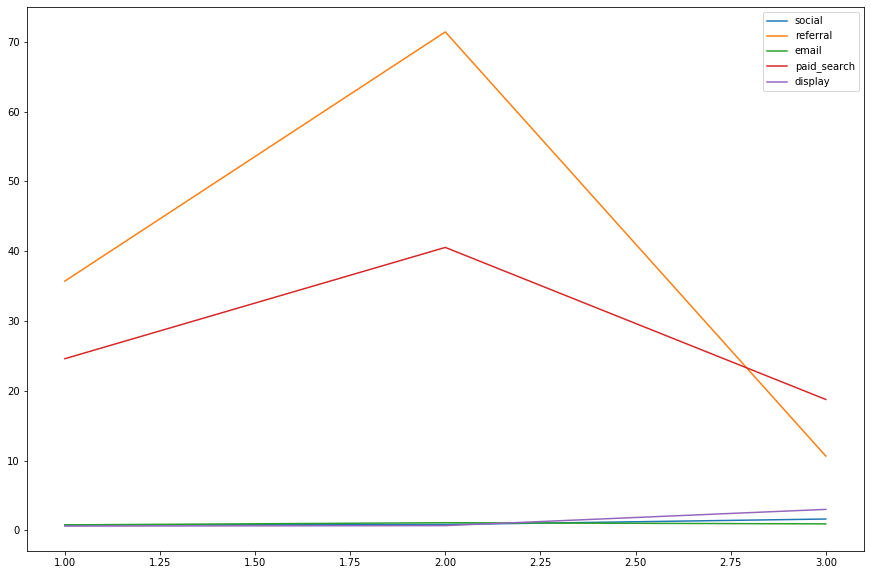

In [154]:
df_M_CAC_PB.plot.line(figsize = (15,10))

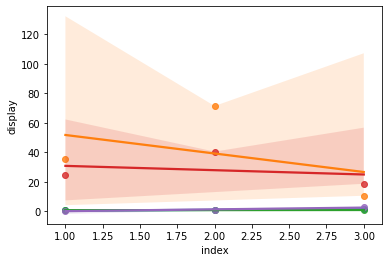

In [160]:
for i in channel:
    if i in df_M_CAC_PB.columns:
        sns.regplot(data = df_M_CAC_PB.reset_index(), x = 'index', y = i)